In [2]:
%matplotlib inline
from preamble import *

### Tutorial

- Jupyter notebook tutorial : https://www.youtube.com/watch?v=HW29067qVWk
- Pandas tutorial :https://www.youtube.com/watch?v=ZyhVh-qRZPA
- Numpy : https://www.youtube.com/watch?v=GB9ByFAIAH4

### Recap : AI, ML, DL

<img src="images/ml_dl_vs_ai_1.png">

<img src="images/MLvsDL3.webp">

<img src="images/nueural_nets.png">

# Chapter 2

- Today
  -  Supervised learning : Classification  and Regression
  -  Toy SKlearn dataset
  -  Train simple KNN algorithm

## Supervised Learning

- Supervised machine learning is one of the most commonly used and successful types of machine learning <br><br>


- Supervised learning is used whenever we want to predict a certain outcome from a given input, and we have examples of input/output pairs <br><br>



> Analogy : Imagine a computer is a child, we are its supervisor (e.g. parent, guardian, or teacher), and we want the child (computer) to learn what a pig looks like. We will show the child several different pictures, some of which are pigs and the rest could be pictures of anything (cats, dogs, etc).When we see a pig, we shout “pig!” When it’s not a pig, we shout “no, not pig!” After doing this several times with the child, we show them a picture and ask “pig?” and they will correctly (most of the time) say “pig!” or “no, not pig!” depending on what the picture is. That is supervised machine learning.





<img src="images/alade.jpeg">

#### Types of classification

- There are two major types of supervised machine learning problems, called classi#cation and regression



<img src="images/class_vs_reg.png" style="width: 700px;/">


## Classification

Classification can be Binary classification or multi-class classification <br><br>

- Binary Classification: Classification tasks with two classes.
- Multi-class Classification: Classification tasks with more than two classes.
 
 <img src="images/binary_vs_multilabel.png" style="width: 700px;/">




Some algorithms are designed for binary classification problems, not multi-classification problem. Examples include : Logistic Regression, Perceptron and Support Vector Machines.

However, heuristic methods can be used to split a multi-class classification problem into multiple binary classification datasets and train a binary classification model each (One-vs-Rest (OvR), One-vs-One (OvO))


### Generalization

> Generalization refers to how well the concepts learned by a machine learning model apply to specific examples not seen by the model when it was learning.

- In supervised , the goal of a good model is to generalize well from the training data to any unseen data from the problem domain. This allows us to make predictions in the future on data the model has never seen. <br><br>

- If a model is able to make accurate predictions on unseen data, we say it is able to **generalize** from the training set to the test set.  <br><br>
  
- We want to build a model that is able to generalize as accurately as possible. <br><br>
- Two terminologies are used in machine learning when we talk about how well a machine learning model learns and generalizes to new data: **overfitting** and **underfitting** <br><br>



### Ocerfitting vs Underfitting

- Overfitting and underfitting are the two biggest causes for poor performance of machine learning algorithms.

- 

![model_complexity](images/overfitting_underfitting_cartoon.png)

### Relation of Model Complexity to Dataset Size

#### Never underestimate the power of more data
> It’s important to note that model complexity is intimately tied to the variation of inputs contained in your training dataset: the larger variety of data points your dataset contains, the more complex a model you can use without overfitting. <br><br>

> Usually, collecting more data points will yield more variety, so larger datasets allow building more complex models. However, simply duplicating the same data points or collecting very similar data will not help. <br><br>

> Having more data and building appropriately more complex models can often work wonders for supervised learning tasks.

> In the real world, you often have the ability to decide how much data to collect, which might be more beneficial than tweaking and tuning your model. 


### Supervised Machine Learning Algorithms
- We will use top-down approach of learning  <br><br>
- We will now review the most popular machine learning algorithms and explain how they learn from data and how they make predictions.<br><br>

- We will examine the strengths and weaknesses of each algorithm, and what kind of data they can best be applied to.<br><br>
  
-  We will also explain the meaning of the most important parameters and options. <br><br>

-  Many algorithms have a classification and a regression variant, and we will describe bot


#### Some Sample or Toy Datasets

- We will use several datasets to illustrate the different algorithms. Some of the datasets will be small and synthetic (meaning made-up). <br><br>
- In Sklearn : https://scikit-learn.org/stable/datasets/toy_dataset.html




>  An example of a synthetic two-class classification dataset is the forge dataset, which has two features


Text(0, 0.5, 'Second feature')

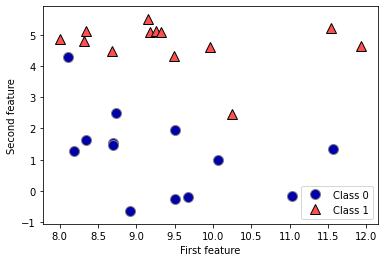

In [3]:
# Matplotlib session?
# generate dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")

In [4]:
# how many data points do we have?
print("X.shape:", X.shape)

X.shape: (26, 2)


As you can see from X.shape, this dataset consists of 26 data points, with 2 features


In [5]:
X
y

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

> When do we use Scatter plot?

The main purpose of a scatter plot is to show how strong the relationship, or correlation, between the two variables is. The tighter the data points fall along a straight line, the higher the correlation (positive, negative, none).

Scatter plots' show relationships between two numeric variables. The dots in a scatter plot not only report the values of individual data points, but also patterns when the data are taken as a whole

Read more here: https://jhudatascience.org/tidyversecourse/dataviz.html#:~:text=Scatterplots%20are%20helpful,sets%20of%20numbers.

> To illustrate example of regression algorithms, we will use the synthetic wave dataset

The wave dataset has a single input feature and a continuous target variable (or response) that we want to model



Text(0, 0.5, 'Target')

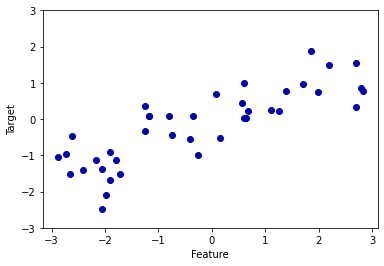

In [6]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

Question: How do we decide what we put on x and y axis in scatter plot?

The **independent variable** should be plotted on the x axis. The **dependent variable** (the one affected by the independent variable) should be plotted on the y axis.

In the above plot, we plot the single feature on the x-axis and the regression target (the output) on the y-axis


#### Low-dimension dataset

**low-dimensional datasets** is a dataset with few feautures. For example data with two feauture is easy and can be easily plot with scatter plot. When the dimensionality of the dataset is low, it is possible (and “easy”) for an analyst to look at the interplay of factors in detail, and understand the data before going on to build the model. Doing so can help the analyst identify patterns in the data that may not be that apparent to a machine. 


#### Hih-dimension data

Low-dimensional datasets is a dataset with many feautures. High dimensional data cannot ploted with Scatterplot.

##### Rwo real-world datasets that are included in scikit-learn


- The previous datasets are synthetic, meaning we created them. <br><br>
- We will also used two real-word datasets  included in Scikit-learn <br><br>

#### Wisconsis Dataset

- Wisconsin Breast Cancer dataset (cancer, for short), which records clinical measurements of breast cancer tumors. Each tumor is labeled as “benign” (for harmless tumors) or “malignant” (for cancerous tumors), and the task is to learn to predict whether a tumor is malignant based on the measurements of the tissue <br><br>
- See here : https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer


In [7]:
#The data can be loaded using the load_breast_cancer function from scikit-learn:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

> Datasets that are included in scikit-learn are usually stored as Bunch objects, which contain some information about the dataset as well as the actual data. All you need to know about Bunch objects is that they behave like dictionaries, with the added benefit that you can access values using a dot (as in bunch.key instead of bunch['key'])

How many feautures and instances do we have?

In [8]:
cancer.data.shape
#The dataset consists of 569 data points, with 30 features each:

(569, 30)

What are the targets?

In [9]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [10]:
cancer.target_names # use list to change to list

array(['malignant', 'benign'], dtype='<U9')

What are they feautures?

In [11]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

How many malignant and beingn do we have?

In [12]:
print("Sample counts per class:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Sample counts per class:
 {'malignant': 212, 'benign': 357}


#### Boston Housing Dataset

- We will also be using a real-world regression dataset, the Boston Housing dataset. <br><br>
  
-  The task associated with this dataset is to predict the median value of homes in several Boston neighborhoods in the 1970s, using information such as crime rate, proximity to the Charles River, highway accessibility, and so on.  <br><br>

-  The dataset contains 506 data points, described by 13 features <br><br>

In [13]:
from sklearn.datasets import load_boston
boston = load_boston()

What is the shape of the dataset?, what shape tell us?

In [14]:
print("Data shape:", boston.data.shape)

Data shape: (506, 13)


> For our purposes here, we will actually expand this dataset by not only considering these 13 measurements as input features, but also looking at all products (also called interactions) between features. In other words, we will not only consider crime rate and highway accessibility as features, but also the product of crime rate and highway accessibility. Including derived feature like these is called feature engineering, which we will discuss in more detail in Chapter 4. This derived dataset can be loaded using the load_extended_boston function


In [15]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape) 

X.shape: (506, 104)


> The resulting 104 features are the 13 original features together with the 91 possible combinations of two features within those 13


## Machine Learning Algorithms

#### Nearest Neighbors : k-Nearest Neighbors

- The k-NN algorithm is arguably the simplest machine learning algorithm. The algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other. 
   
   - “Birds of a feather flock together.”  It just classifies a data point based on its few nearest neighbors. How many neighbors? That is what we decide. <br><br>

   - <img src="images/knn.jpeg"> <br><br> 

- It can be used to solve both classification and regression problems. <br><br>

-  KNN for classification predicts a new sample using the idea of similarity or K-closest samples from the training set. “Closeness” is determined by a distance metric, like Euclidean and Minkowsk ( how to calculate distance : https://www.mathsisfun.com/algebra/distance-2-points.html) <br><br>

- Building the model consists only of storing the training dataset. <br><br>

- Class probability estimates for the new sample are calculated as the proportion of training set neighbors in each class. The new sample’s predicted class is the class with the highest probability estimate; if two or more classes are tied for the highest estimate, then the tie is broken at random or by looking ahead to the K + 1 closest neighbor



> For any distance metric, it is important to recall that the original measurement scales of the predictors affect the resulting distance calculations. This implies that if predictors are on widely different scales, the distance value between samples will be biased towards predictors with larger scales. To allow each predictor to contribute equally to the distance calculation, we recommend centering and scaling all predictors prior to performing KNN


#### k-Neighbors classification

-  In its simplest version, the k-NN algorithm only considers exactly one nearest neighbor, which is the closest training data point to the point we want to make a prediction for.  <br><br>

-  The prediction is then simply the known output for this training point. Figure 2-4 illustrates this for the case of classification on the forge dataset


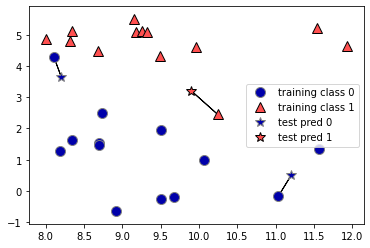

In [16]:
# n_neighbors is an example of hyperparameters or model hyperparameters
mglearn.plots.plot_knn_classification(n_neighbors=1)

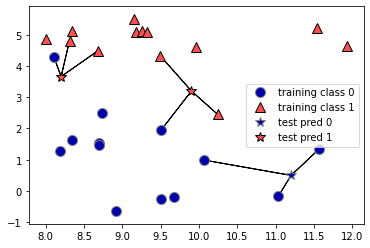

In [17]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

Instead of considering only the closest neighbor, we can also consider an arbitrary number, k, of neighbors. This is where the name of the k-nearest neighbors algorithm comes from. <br><br>

When considering more than one neighbor, we use voting to assign a label. This means that for each test point, we count how many neighbors belong to class 0 and how many neighbors belong to class 1. We then assign the class that is more frequent: in other words, the majority class among the k-nearest neighbor



#### How to apply KNN Algorithm?

In [18]:
# frame the problem
# get the data, 
#prepare the data

from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge() # synthethic dataset with 2 features
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


Next, we import and instantiate the class. This is when we can set parameters, like the number of neighbors to use: 

In [19]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)

Now, we fit the classifier using the training set. For KNeighborsClassifier this means storing the dataset, so we can compute neighbors during prediction:


In [20]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

To make predictions on the test data, we call the predict method. For each data point in the test set, this computes its nearest neighbors in the training set and finds the most common class among these:


In [21]:
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 0, 0])

What is our real y_test, that has been predicted? 

In [22]:
y_test

#Classification accuracy : we look at the accuracy of that model as the number of correct predictions from all predictions made.


array([1, 0, 1, 0, 1, 1, 0])

But, we cannot do this for large dataset and go and check manually were the model is correct.


To evaluate how well our model generalizes, we can call the score method with the test data together with the test labels:

In [23]:
clf.score(X_test, y_test) # returns the mean accuracy, which is a classification metrics

0.8571428571428571

Classification metric is a number that measures the performance that your machine learning model when it comes to assigning observations to certain classes. <br><br>

Typically the performance is presented on a range from 0 to 1 (though not always) where a score of 1 is reserved for the perfect model. 

More : https://towardsdatascience.com/the-5-classification-evaluation-metrics-you-must-know-aa97784ff226



##### What score funtion does?

It calculate the mean

In [24]:
y_pred

array([1, 0, 1, 0, 1, 0, 0])

In [25]:
y_test

array([1, 0, 1, 0, 1, 1, 0])

In [26]:
y_pred == y_test

array([ True,  True,  True,  True,  True, False,  True])

In [27]:
np.mean(y_pred == y_test)

0.8571428571428571

We see that our model is about 86% accurate, meaning the model predicted the class correctly for 86% of the samples in the test dataset.

##### Analyzing KNeighborsClassifier

- For two-dimensional datasets, we can also illustrate the prediction for all possible test points in the xy-plane.  <br><br>
  
- We color the plane according to the class that would be assigned to a point in this region.  <br><br>

- This lets us view the decision boundary, which is the divide between where the algorithm assigns class 0 versus where it assigns class. <br><br>


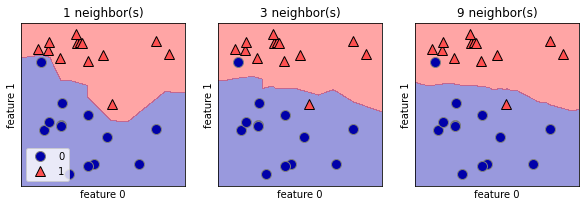

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

- As you can see on the left in the figure, using a single neighbor results in a decision boundary that follows the training data closely <br><br>

- Considering more and more neighbors leads to a smoother decision boundary.  <br><br>

- A smoother boundary corresponds to a simpler model. In other words, using few neighbors corresponds to high model complexity (as shown on the right side of Figure 2-1), and <br><br>

- using many neighbors corresponds to low model complexity (as shown on the left side of Figure 2-1)


Question : Question: What is the influence of the hyperparamter n_neighbour??

<img src="images/train_test_val.png" style="width: 700px;/"> 


- Let’s investigate whether we can confirm the connection between model complexity and generalization <br><br>

- We use a real word breast_cancer dataset

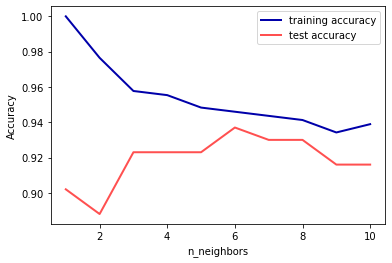

In [29]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)
# both train_size and test_size are not available? tes_size will be 0.25 and train_size will be 0.75
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

- Considering a single nearest neighbor, the prediction on the training set is perfect. But when more neighbors are considered, the model becomes simpler and the training accuracy drops.  <br><br> 
  
- The test set accuracy for using a single neighbor is lower than when using more neighbors, indicating that using the single nearest neighbor leads to a model that is too complex. <br><br> 

- On the other hand, when considering 10 neighbors, the model is too simple and performance is even worse. <br><br> 
  
- The best performance is somewhere in the middle, using around six neighbors. Still, it is good to keep the scale of the plot in mind. The worst performance is around 88% accuracy, which might still be acceptable <br><br> 


##### k-neighbors regression

- There is also a regression variant of the k-nearest neighbors algorithm.  <br><br>

- let’s start by using the single nearest neighbor using the wave dataset.It has a single input feature and a continuous target variable (or response) that we want to model <br><br>

- If you have not install mglearn, install here : https://github.com/amueller/mglearn
 



Text(0, 0.5, 'Target')

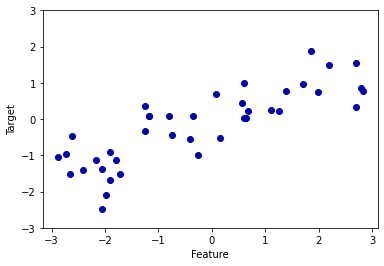

In [30]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

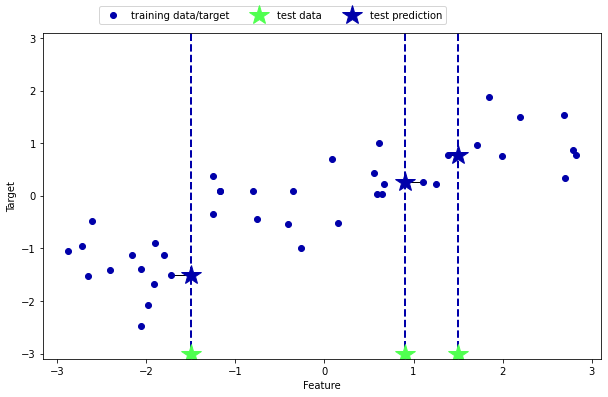

In [31]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

> Note : we can use more than the single closest neighbor for regression. When using multiple nearest neighbors, the prediction is the average, or mean, of the relevant neighbors


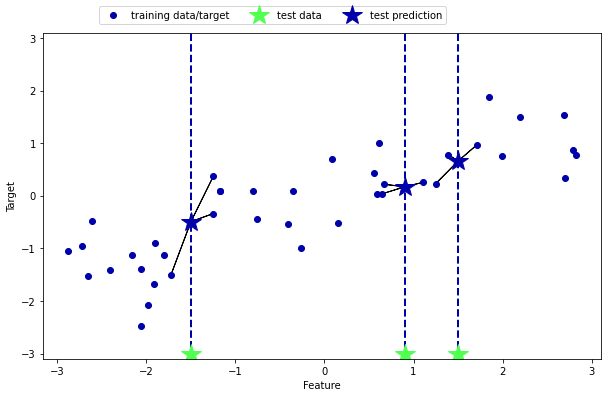

In [32]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

#### The k-nearest neighbors algorithm for regression 


In [33]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

Now, we can make predic

In [34]:
reg.predict(X_test)

array([-0.054,  0.357,  1.137, -1.894, -1.139, -1.631,  0.357,  0.912,
       -0.447, -1.139])

In [35]:
reg.score(X_test, y_test)
#print(r_squared)
#print(f"Test set R^2:  {r_squared:.2f}")
# more on decimal places using fstring:https://stackoverflow.com/questions/45310254/fixed-digits-after-decimal-with-f-strings

0.8344172446249605

The R2 score, also known as the coefficient of determination, is a measure of goodness of a prediction for a regression model, and yields a score between 0 and 1. A value of 1 corresponds to a perfect prediction, and a value of 0 corresponds to a constant model that just predicts the mean of the training set responses, y_train


The score is 0.83, which indicates a relatively good model fit.


#### Analyzing KNeighborsRegressor

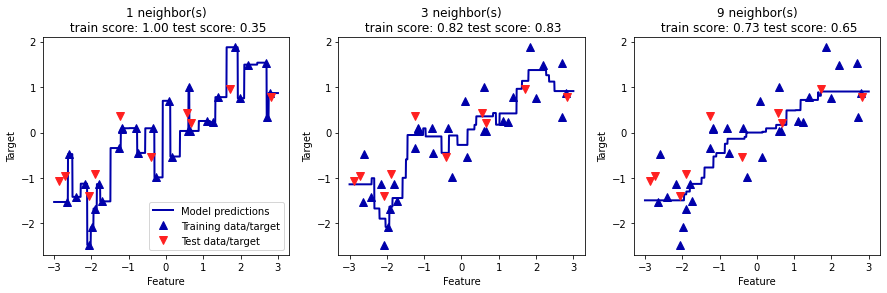

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

##### Strengths, weaknesses, and parameters

- In principle, there are two important parameters to the KNeighbors classifier: the number of neighbors and how you measure distance between data points.<br><br>

- In practice, using a small number of neighbors like three or five often works well, but you should certainly adjust this parameter. Choosing the right distance measure is somewhat beyond the scope of this book. By default, Euclidean distance is used, which works well in many settings. <br><br>
  
- One of the strengths of k-NN is that the model is very easy to understand, and often gives reasonable performance without a lot of adjustments. Using this algorithm is a good baseline method to try before considering more advanced techniques. <br><br>
  
- Building the nearest neighbors model is usually very fast, but when your training set is very large (either in number of features or in number of samples) prediction can be slow. <br><br>

- When using the k-NN algorithm, it’s important to preprocess your data (see Chapter 3). This approach often does not perform well on datasets with many features (hundreds or more), and it does particularly badly with datasets where most features are 0 most of the time (so-called sparse datasets). <br><br>

- So, while the nearest k-neighbors algorithm is easy to understand, it is not often used in practice, due to prediction being slow and its inability to handle many features. The method we discuss next has neither of these drawbacks<br><br>


### Linear Models

- Linear models are a class of models that are widely used in practice and  make a prediction using a linear function of the input features.   <br><br>
- They can be use for both regression and classification  <br><br>
  
#### Linear models for regression

- Linear regression is a linear model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). More specifically, that y can be calculated from a linear combination of the input variables (x). <br><br>


- The general formula for linear models for regression is :  <br><br>
 
<img src="images/linearmodels.png" style="width: 700px;/"> 


- Explanatory variables (features), B0...Bn are parameters of the model that are learned and y is the prediction <br><br>

- Linear regression was developed in the field of statistics and is studied as a model for understanding the relationship between input and output numerical variables, but has been borrowed by machine learning. It is both a statistical algorithm and a machine learning algorithm <br><br>
 
- When there is a single input variable (x), the method is referred to as simple linear regression. When there are multiple input variables, literature from statistics often refers to the method as multiple linear regression. <br><br>

- Different techniques can be used to prepare or train the linear regression equation from data, the most common of which is called Ordinary Least Squares. It is common to therefore refer to a model prepared this way as Ordinary Least Squares Linear Regression or just Least Squares Regression. <br><br>

> For datasets with many features, linear models can be very powerful.





##### Linear models for regression
\begin{align*}
\end{align*}





w[0]: 0.393906  b: -0.031804


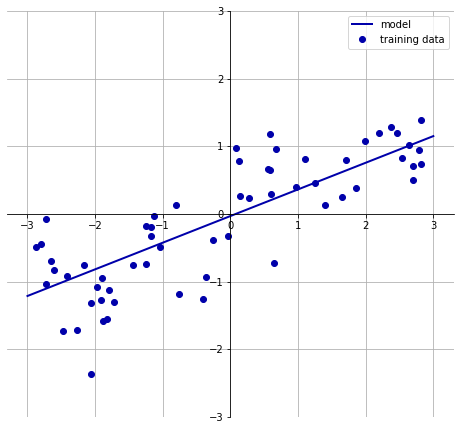

In [74]:
mglearn.plots.plot_linear_regression_wave()
# y = mx + c

#### Type of Linear Models for Regression

- There are many different linear models for regression. The book covers the following: 
  - Linear regression (aka ordinary least squares)
  - Ridge regression
  - Lasso <br><br>
  
-  The difference between these models lies in how :
   -  the model parameters B0 (intercept) and Bn (Slope) are learned from the training data, and 
   -  how model complexity can be controlled.


#### Linear regression aka ordinary least squares

- Linear regression, or ordinary least squares (OLS), is the simplest and most classic linear method for regression.  <br><br>
- It finds the parameters bo and b1 (y = b0 + b1x + e) that minimize the mean squared error between predictions and the true regression targets, y, on the training set.  <br><br>
- The mean squared error is the sum of the squared differences between the predictions and the true values. <br><br>
- Linear regression has no parameters, which is a benefit, but it also has no way to control model complexity <br><br>
- The mathematical formula of the linear regression can be written as y = b0 + b1*x + e, where:

    - b0 is the intercept of the regression line; that is the predicted value when x = 0.
    - b1 is the slope of the regression line.
    - e is the error term (also known as the residual errors), the part of y that can be explained by the regression model
The figure below illustrat


<img src="images/simple_linear_Reg.png" style="width: 700px;/"> 

In [75]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [60]:
# slope and intercept are store at : coef_ and ntercept_ aattributes

print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.394]
lr.intercept_: -0.03180434302675976


The intercept_ attribute is always a single float number, while the coef_ attribute is a NumPy array with one entry per input feature. As we only have a single input feature in the wave dataset, lr.coef_ only has a single entry


> You might notice the strange-looking trailing underscore at the end of coef_ and intercept_. scikit-learn always stores anything that is derived from the training data in attributes that end with a trailing underscore. That is to separate them from parameters that are set by the user.


Training set score

In [76]:
lr.score(X_train, y_train)

0.6700890315075756

Test set score

In [77]:
lr.score(X_test, y_test)

0.65933685968637

>  R squared is the measure of goodness of fit of the model. It is also known as the Coefficient of Determination, is a value between 0 and 1 that measures how well our regression line fits our data. The closer R-Squared is to 1 or 100% the better our model will be at predicting our dependent variable : https://medium.com/@erika.dauria/looking-at-r-squared-721252709098

- An R2 of around 0.66 is not very good, but we can see that the scores on the training and test sets are very close together. This means we are likely underfitting, not overfitting. For this one-dimensional dataset, there is little danger of overfitting, as the model is very simple (or restricted). 

- However, with higher-dimensional datasets (meaning datasets with a large number of features), linear models become more powerful, and there is a higher chance of overfitting.

Linear  Regression performance on a more complex dataset, like the Boston Housing dataset


In [78]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [81]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


> This discrepancy between performance on the training set and the test set is a clear sign of overfitting, and therefore we should try to find a model that allows us to control complexity. One of the most commonly used alternatives to standard linear regression is ridge regression.

An extension to linear regression invokes adding penalties to the loss function during training that encourages simpler models that have smaller coefficient values. These extensions are referred to as regularized linear regression or penalized linear regression. We will see some of them next.

##### Ridge regression

Ridge Regression is a popular type of regularized linear regression that includes an L2 penalty. This has the effect of shrinking the coefficients for those input variables that do not contribute much to the prediction task.





In [82]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train) # default alpha = 1 (L2)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train))) # remember we are using the same Boston Dataset
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

Training set score: 0.89
Test set score: 0.75


- As you can see, the training set score of Ridge is lower than for LinearRegression, while the test set score is higher. With linear regression, we were overfitting our data

- But, Ridge is a more restricted model, so we are less likely to overfit



> A less complex model means worse performance on the training set, but better generalization

Increasing alpha decreases training set performance but might help generalization <br><br>


In [83]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


- For very small values of alpha, coefficients are barely restricted at all, and we end up with a model that resembles LinearRegression

In [86]:
ridge01 = Ridge(alpha= 1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


So, how do we choose Alpha? Scikit-learn includes a RidgeCV method that allows us select the ideal value for alpha.

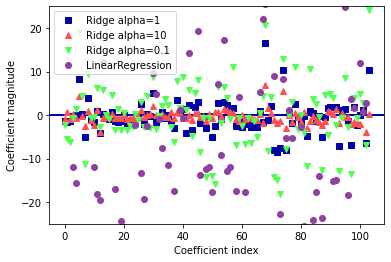

In [52]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

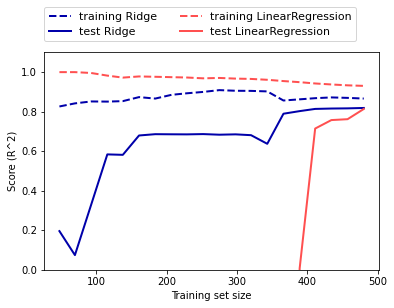

In [53]:
mglearn.plots.plot_ridge_n_samples()

> The lesson here is that with enough training data, regularization becomes less important, and given enough data, ridge and linear regression will have the same performance. Also, If more data is added, it becomes harder for a model to overfit, or memorize the data.


##### Lasso

- Lasso Regression is a popular type of regularized linear regression that use L1 penalty   <br><br>
- As with ridge regression, using the lasso also restricts coefficients to be close to zero, but in a slightly different way, called L1 regularization <br><br>
- The consequence of L1 regularization is that when using the lasso, some coefficients are exactly zero. This means some features are entirely ignored by the model. This can be seen as a form of automatic feature selection. Having some coefficients be exactly zero often makes a model easier to interpret, and can reveal the most important features of your model  <br><br>
  
- An L1 penalty minimizes the size of all coefficients and allows some coefficients to be minimized to the value zero, which removes the predictor from the model. <br><br>
-  L1 and L2 Intuitive diff : https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c

In [89]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1).fit(X_train, y_train) # default alpha = 1.0, and alpha = 0 is equivalent to an ordinary least square
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

Training set score: 0.77
Test set score: 0.63
Number of features used: 8


> As you can see, Lasso does quite badly, both on the training and the test set. This indicates that we are underfitting, and we find that it used only 4 of the 105 features. 

What if we change alpha = 0?

Similar to Ridge, Lasso has a regularization parameter, alpha, that controls how strongly coefficients are pushed toward zero.

In [90]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


> A lower alpha allowed us to fit a more complex model, which worked better on the training and test data. The performance is slightly better than using Ridge, and we are using only 33 of the 105 features. This makes this model potentially easier to understand

However, if we set alpha too low, however, we again remove the effect of regularization and end up overfitting, with a result similar to LinearRegression:

In [91]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


> In practice, ridge regression is usually the first choice between these two models. However, if you have a large amount of features and expect only a few of them to be important, Lasso might be a better choice.

Text(0, 0.5, 'Coefficient magnitude')

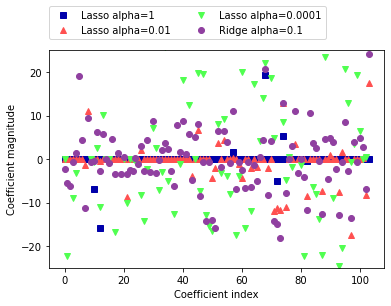

In [72]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

##### Linear models for classification

\begin{align*}
\end{align*}

/Users/shamsuddeenmuhammad/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


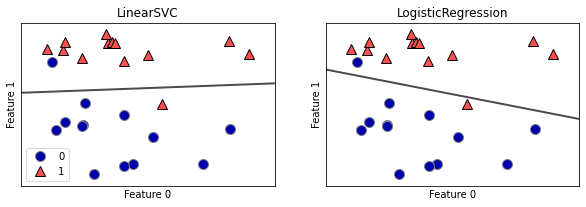

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

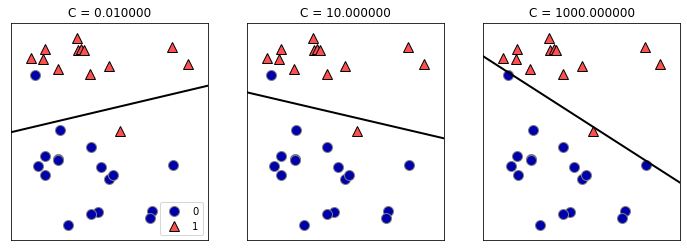

In [42]:
mglearn.plots.plot_linear_svc_regularization()

In [43]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.948
Test set score: 0.958


/Users/shamsuddeenmuhammad/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

/Users/shamsuddeenmuhammad/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training set score: 0.953
Test set score: 0.965


In [45]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


/Users/shamsuddeenmuhammad/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


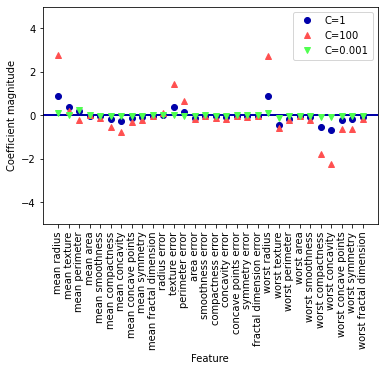

In [46]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92


/Users/shamsuddeenmuhammad/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


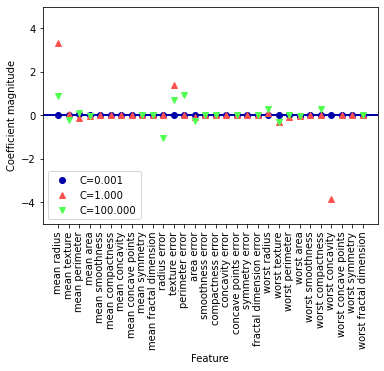

In [47]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, solver='liblinear', penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

##### Linear models for multiclass classification
\begin{align*}
\end{align*}

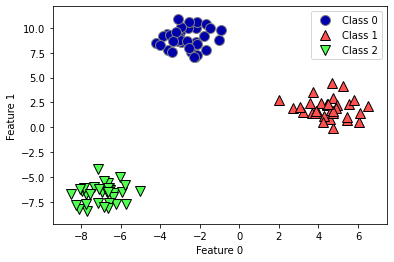

In [48]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [49]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


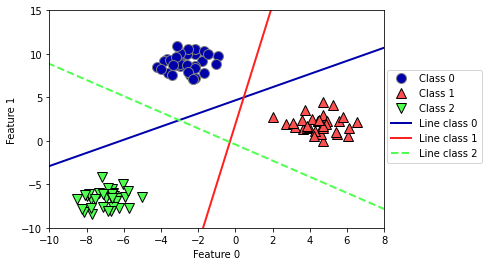

In [50]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

Text(0, 0.5, 'Feature 1')

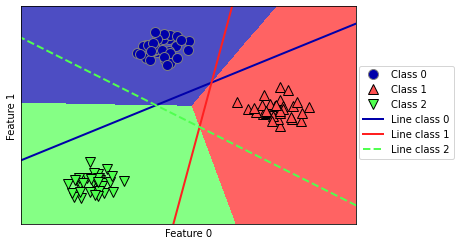

In [51]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### Strengths, weaknesses and parameters

In [52]:
# instantiate model and fit it in one line
logreg = LogisticRegression().fit(X_train, y_train)

/Users/shamsuddeenmuhammad/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
logreg = LogisticRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test)

/Users/shamsuddeenmuhammad/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)

/Users/shamsuddeenmuhammad/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Naive Bayes Classifiers

In [55]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [56]:
counts = {}
for label in np.unique(y):
    # iterate over each class
    # count (sum) entries of 1 per feature
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n", counts)

Feature counts:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


#### Strengths, weaknesses and parameters

### Decision trees

In [57]:
import sys
sys.path

['/Users/shamsuddeenmuhammad/Documents/Vscdoe/introduction_to_ml_with_python',
 '/Users/shamsuddeenmuhammad/.vscode-insiders/extensions/ms-toolsai.jupyter-2021.11.1001506843/pythonFiles',
 '/Users/shamsuddeenmuhammad/.vscode-insiders/extensions/ms-toolsai.jupyter-2021.11.1001506843/pythonFiles/lib/python',
 '/Users/shamsuddeenmuhammad/anaconda3/envs/datascience/lib/python39.zip',
 '/Users/shamsuddeenmuhammad/anaconda3/envs/datascience/lib/python3.9',
 '/Users/shamsuddeenmuhammad/anaconda3/envs/datascience/lib/python3.9/lib-dynload',
 '',
 '/Users/shamsuddeenmuhammad/anaconda3/envs/datascience/lib/python3.9/site-packages',
 '/Users/shamsuddeenmuhammad/anaconda3/envs/datascience/lib/python3.9/site-packages/IPython/extensions',
 '/Users/shamsuddeenmuhammad/.ipython']

In [58]:
mglearn.plots.plot_animal_tree()

ModuleNotFoundError: No module named 'graphviz'

##### Building decision trees

In [ ]:
mglearn.plots.plot_tree_progressive()

##### Controlling complexity of decision trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

In [ ]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

#### Analyzing Decision Trees

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

In [ ]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### Feature Importance in trees

In [ ]:
print("Feature importances:")
print(tree.feature_importances_)

In [ ]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

In [ ]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

In [ ]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date
X_train = data_train.date[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

In [ ]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

#### Strengths, weaknesses and parameters

#### Ensembles of Decision Trees
##### Random forests
###### Building random forests
###### Analyzing random forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

In [ ]:
plot_feature_importances_cancer(forest)

###### Strengths, weaknesses, and parameters

#### Gradient Boosted Regression Trees (Gradient Boosting Machines)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

##### Strengths, weaknesses and parameters

#### Kernelized Support Vector Machines
#### Linear Models and Non-linear Features

In [ ]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [ ]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [ ]:
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])


from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y==0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

In [ ]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

In [ ]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### The Kernel Trick
#### Understanding SVMs
\begin{align*}
\end{align*}

In [ ]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()                                                                  
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### Tuning SVM parameters

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

In [ ]:
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

##### Preprocessing data for SVMs

In [ ]:
# Compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# Compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n", X_train_scaled.min(axis=0))
print("Maximum for each feature\n", X_train_scaled.max(axis=0))

In [ ]:
# use THE SAME transformation on the test set,
# using min and range of the training set. See Chapter 3 (unsupervised learning) for details.
X_test_scaled = (X_test - min_on_training) / range_on_training

In [ ]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
        svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

In [ ]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

#### Strengths, weaknesses and parameters

### Neural Networks (Deep Learning)
#### The Neural Network Model

In [ ]:
display(mglearn.plots.plot_logistic_regression_graph())

In [ ]:
display(mglearn.plots.plot_single_hidden_layer_graph())

In [ ]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

In [ ]:
mglearn.plots.plot_two_hidden_layer_graph()

#### Tuning Neural Networks

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [ ]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [ ]:
# using two hidden layers, with 10 units each
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [ ]:
# using two hidden layers, with 10 units each, now with tanh nonlinearity.
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In [ ]:
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

In [ ]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)

# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

In [ ]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

In [ ]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

In [ ]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

#### Strengths, weaknesses and parameters
##### Estimating complexity in neural networks

### Uncertainty estimates from classifiers

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# we rename the classes "blue" and "red" for illustration purposes:
y_named = np.array(["blue", "red"])[y]

# we can call train_test_split with arbitrarily many arrays;
# all will be split in a consistent manner
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
    train_test_split(X, y_named, y, random_state=0)

# build the gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

#### The Decision Function

In [ ]:
print("X_test.shape:", X_test.shape)
print("Decision function shape:",
      gbrt.decision_function(X_test).shape)

In [ ]:
# show the first few entries of decision_function
print("Decision function:", gbrt.decision_function(X_test)[:6])

In [ ]:
print("Thresholded decision function:\n",
      gbrt.decision_function(X_test) > 0)
print("Predictions:\n", gbrt.predict(X_test))

In [ ]:
# make the boolean True/False into 0 and 1
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# use 0 and 1 as indices into classes_
pred = gbrt.classes_[greater_zero]
# pred is the same as the output of gbrt.predict
print("pred is equal to predictions:",
      np.all(pred == gbrt.predict(X_test)))

In [ ]:
decision_function = gbrt.decision_function(X_test)
print("Decision function minimum: {:.2f} maximum: {:.2f}".format(
      np.min(decision_function), np.max(decision_function)))

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                                fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                            alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1))

#### Predicting Probabilities

In [ ]:
print("Shape of probabilities:", gbrt.predict_proba(X_test).shape)

In [ ]:
# show the first few entries of predict_proba
print("Predicted probabilities:")
print(gbrt.predict_proba(X_test[:6]))

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    
mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
# don't want a transparent colorbar
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1))

![classifier_comparison](images/classifier_comparison.png)

#### Uncertainty in multiclass classification

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

In [ ]:
print("Decision function shape:", gbrt.decision_function(X_test).shape)
# plot the first few entries of the decision function
print("Decision function:")
print(gbrt.decision_function(X_test)[:6, :])

In [ ]:
print("Argmax of decision function:")
print(np.argmax(gbrt.decision_function(X_test), axis=1))
print("Predictions:")
print(gbrt.predict(X_test))

In [ ]:
# show the first few entries of predict_proba
print("Predicted probabilities:")
print(gbrt.predict_proba(X_test)[:6])
# show that sums across rows are one
print("Sums:", gbrt.predict_proba(X_test)[:6].sum(axis=1))

In [ ]:
print("Argmax of predicted probabilities:")
print(np.argmax(gbrt.predict_proba(X_test), axis=1))
print("Predictions:")
print(gbrt.predict(X_test))

In [ ]:
logreg = LogisticRegression()

# represent each target by its class name in the iris dataset
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("unique classes in training data:", logreg.classes_)
print("predictions:", logreg.predict(X_test)[:10])
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("argmax of decision function:", argmax_dec_func[:10])
print("argmax combined with classes_:",
      logreg.classes_[argmax_dec_func][:10])

### Summary and Outlook